In [7]:
import networkx as nx
import numpy as np
from matplotlib import pyplot as plt
from utils import graph, draw_path
import math
from queue import PriorityQueue

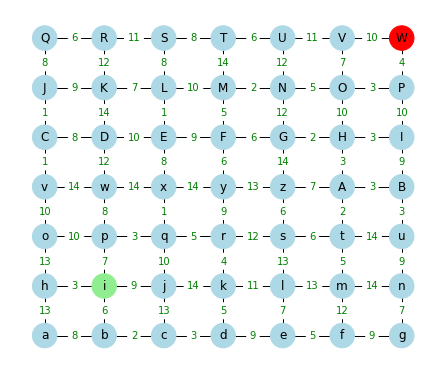

In [8]:
np.random.seed(1111)

G, pos, color = graph('i', 'W')

plt.figure(figsize=(6,5))
labels = nx.get_edge_attributes(G,'weight')
nx.draw(G, pos=pos, 
        node_color=color, 
        with_labels=True,
        node_size=600)
nx.draw_networkx_edge_labels(G, pos=pos, edge_labels=labels, rotate=False, font_color='green');

In [9]:
def dijkstra(graph: nx.classes.graph.Graph, start: str, end : str):

    def backtrace(prev, start, end):
        node = end
        path = []
        while node != start:
            path.append(node)
            node = prev[node]
        path.append(node) 
        path.reverse()
        return path
    
    def cost(u, v):
        return graph.get_edge_data(u,v).get('weight')

    prev = {}
    dist = {v: math.inf for v in G.nodes}
    visited = set()
    pq = PriorityQueue()

    dist[start] = 0
    pq.put((dist[start], start))

    while not pq.empty():
        curr_cost, curr_n = pq.get()
        visited.add(curr_n)
        for neighbor in G.neighbors(curr_n):
            # if we found a shorter path 
            path = dist[curr_n] + cost(curr_n, neighbor)
            if path < dist[neighbor]:
                # update distance, we found a shorter one.
                dist[neighbor] = path
                prev[neighbor] = curr_n
                if neighbor not in visited:
                    visited.add(neighbor)
                    pq.put((dist[neighbor], neighbor))
                else:
                    pq.get((dist[neighbor], neighbor))
                    pq.put((dist[neighbor], neighbor))


    return backtrace(prev, start, end), dist[end]    

In [10]:
path, cost = dijkstra(G, 'i', 'W')

In [11]:
path

['i', 'b', 'c', 'd', 'k', 'r', 's', 't', 'A', 'B', 'I', 'P', 'W']

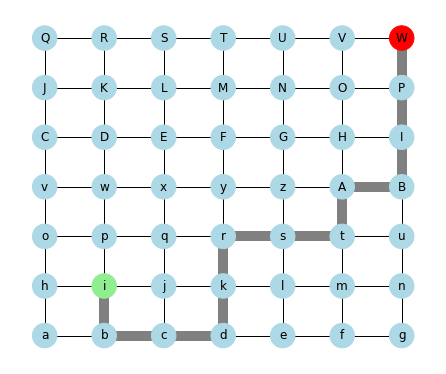

In [12]:
draw_path(G, pos, path, color)